In [34]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [4]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
credit_risk_df = pd.read_csv(Path('./Resources/lending_data.csv'))

# Review the DataFrame
credit_risk_df

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [11]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = credit_risk_df['loan_status']

# Separate the X variable, the features
X = credit_risk_df.iloc[:, :-1]


In [40]:
# Review the y variable Series
y.value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

array([[<Axes: xlabel='loan_size', ylabel='loan_size'>,
        <Axes: xlabel='interest_rate', ylabel='loan_size'>,
        <Axes: xlabel='borrower_income', ylabel='loan_size'>,
        <Axes: xlabel='debt_to_income', ylabel='loan_size'>,
        <Axes: xlabel='num_of_accounts', ylabel='loan_size'>,
        <Axes: xlabel='derogatory_marks', ylabel='loan_size'>,
        <Axes: xlabel='total_debt', ylabel='loan_size'>],
       [<Axes: xlabel='loan_size', ylabel='interest_rate'>,
        <Axes: xlabel='interest_rate', ylabel='interest_rate'>,
        <Axes: xlabel='borrower_income', ylabel='interest_rate'>,
        <Axes: xlabel='debt_to_income', ylabel='interest_rate'>,
        <Axes: xlabel='num_of_accounts', ylabel='interest_rate'>,
        <Axes: xlabel='derogatory_marks', ylabel='interest_rate'>,
        <Axes: xlabel='total_debt', ylabel='interest_rate'>],
       [<Axes: xlabel='loan_size', ylabel='borrower_income'>,
        <Axes: xlabel='interest_rate', ylabel='borrower_income'>,


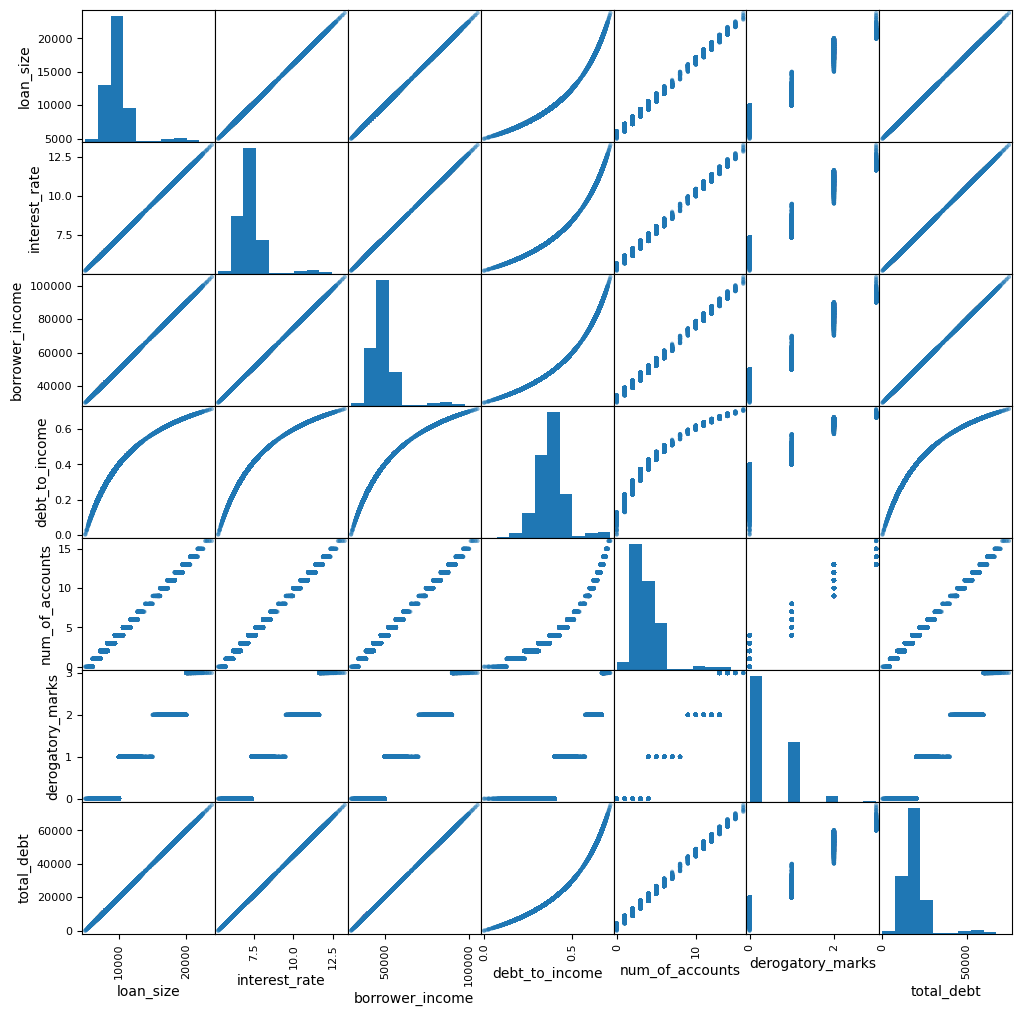

In [25]:
pd.plotting.scatter_matrix(X, figsize=(12, 12))

In [13]:
# Review the X variable DataFrame
X.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000


In [19]:
# This dataset needs to be scaled due to the large variances across the means and standard deviations
X_scaled = StandardScaler().fit_transform(X)
pd.DataFrame(X_scaled, columns=X.columns).describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
count,77536.000000,7.753600e+04,77536.000000,7.753600e+04,7.753600e+04,7.753600e+04,77536.000000
mean,0.000000,-1.407596e-15,0.000000,-1.196457e-15,-4.691987e-17,-5.864983e-17,0.000000
std,1.000006,1.000006e+00,1.000006,1.000006e+00,1.000006e+00,1.000006e+00,1.000006
min,-2.295787,-2.296073e+00,-2.296096,-4.628640e+00,-2.009337e+00,-6.739731e-01,-2.296096
25%,-0.528166,-5.253942e-01,-0.528210,-5.760741e-01,-4.340494e-01,-6.739731e-01,-0.528210
50%,-0.145978,-1.352827e-01,-0.134019,-1.249033e-02,9.104661e-02,-6.739731e-01,-0.134019
75%,0.283984,2.649469e-01,0.260172,4.787266e-01,9.104661e-02,1.043996e+00,0.260172
max,6.685636,6.680987e+00,6.686676,4.140328e+00,6.392198e+00,4.479933e+00,6.686676


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [20]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [26]:
# Import the LogisticRegression module from SKLearn


# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(solver='lbfgs',random_state=1)

# Fit the model using training data
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [29]:
# Make a prediction using the testing data
test_model_prediction = model.predict(X_test)
test_model_prediction

array([0, 1, 0, ..., 0, 0, 0])

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

[[18669    90]
 [   14   611]]


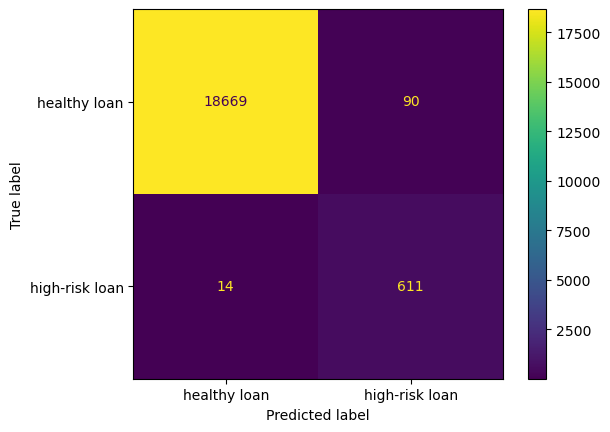

In [39]:
# Generate a confusion matrix for the model
target_names = ['healthy loan', 'high-risk loan']
result_confus_matrix = confusion_matrix(y_test, test_model_prediction)
disp = ConfusionMatrixDisplay.from_predictions(y_test, test_model_prediction, display_labels=target_names)
print(result_confus_matrix)
plt.show()

In [38]:
# Print the classification report for the model

print(classification_report(y_test, test_model_prediction, target_names=target_names, digits=3))

                precision    recall  f1-score   support

  healthy loan      0.999     0.995     0.997     18759
high-risk loan      0.872     0.978     0.922       625

      accuracy                          0.995     19384
     macro avg      0.935     0.986     0.959     19384
  weighted avg      0.995     0.995     0.995     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Overall, the logistic model has an accuracy of 0.99. If we look at the *healthy loan* prediction, we have an almost perfect precision and recall. 
*High Risk Loans* are still very good with a precision of 0.872 and recall of 0.978. This means that a precision of 611/(611+90)=0.872 and recall of 611/(611+14)=0.978.

---